In [117]:
import findspark
findspark.init("C:\\spark")

In [118]:
import pyspark
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# ML in Big Data

## Spark Session and Dataset

In [119]:
import pyspark
from pyspark.sql import SparkSession
from pyspark.conf import SparkConf
from pyspark import SparkContext

spark = SparkSession.builder \
    .master("local") \
    .appName("pyspark_uygulama") \
    .config("spark.executer.memory", "16gb") \
    .getOrCreate()

In [120]:
sc = spark.sparkContext
sc

<SparkContext master=local appName=pyspark_uygulama>

In [121]:
# sc.stop()

In [122]:
spark_df = spark.read.csv(".\\PySpark_Churn_Data\\churn.csv", 
                          header = True, 
                          inferSchema = True,
                          sep = ",")
spark_df.cache()

DataFrame[_c0: int, Names: string, Age: double, Total_Purchase: double, Account_Manager: int, Years: double, Num_Sites: double, Churn: int]

In [123]:
spark_df.printSchema()

root
 |-- _c0: integer (nullable = true)
 |-- Names: string (nullable = true)
 |-- Age: double (nullable = true)
 |-- Total_Purchase: double (nullable = true)
 |-- Account_Manager: integer (nullable = true)
 |-- Years: double (nullable = true)
 |-- Num_Sites: double (nullable = true)
 |-- Churn: integer (nullable = true)



In [124]:
spark_df.show(5)

+---+----------------+----+--------------+---------------+-----+---------+-----+
|_c0|           Names| Age|Total_Purchase|Account_Manager|Years|Num_Sites|Churn|
+---+----------------+----+--------------+---------------+-----+---------+-----+
|  0|Cameron Williams|42.0|       11066.8|              0| 7.22|      8.0|    1|
|  1|   Kevin Mueller|41.0|      11916.22|              0|  6.5|     11.0|    1|
|  2|     Eric Lozano|38.0|      12884.75|              0| 6.67|     12.0|    1|
|  3|   Phillip White|42.0|       8010.76|              0| 6.71|     10.0|    1|
|  4|  Cynthia Norton|37.0|       9191.58|              0| 5.56|      9.0|    1|
+---+----------------+----+--------------+---------------+-----+---------+-----+
only showing top 5 rows



In [125]:
spark_df = spark_df.toDF(*[c.lower() for c in spark_df.columns])
spark_df.show(5)

+---+----------------+----+--------------+---------------+-----+---------+-----+
|_c0|           names| age|total_purchase|account_manager|years|num_sites|churn|
+---+----------------+----+--------------+---------------+-----+---------+-----+
|  0|Cameron Williams|42.0|       11066.8|              0| 7.22|      8.0|    1|
|  1|   Kevin Mueller|41.0|      11916.22|              0|  6.5|     11.0|    1|
|  2|     Eric Lozano|38.0|      12884.75|              0| 6.67|     12.0|    1|
|  3|   Phillip White|42.0|       8010.76|              0| 6.71|     10.0|    1|
|  4|  Cynthia Norton|37.0|       9191.58|              0| 5.56|      9.0|    1|
+---+----------------+----+--------------+---------------+-----+---------+-----+
only showing top 5 rows



In [126]:
spark_df = spark_df.withColumnRenamed("_c0", "index")
spark_df.show(2)

+-----+----------------+----+--------------+---------------+-----+---------+-----+
|index|           names| age|total_purchase|account_manager|years|num_sites|churn|
+-----+----------------+----+--------------+---------------+-----+---------+-----+
|    0|Cameron Williams|42.0|       11066.8|              0| 7.22|      8.0|    1|
|    1|   Kevin Mueller|41.0|      11916.22|              0|  6.5|     11.0|    1|
+-----+----------------+----+--------------+---------------+-----+---------+-----+
only showing top 2 rows



In [127]:
# shape
spark_df.count(), len(spark_df.columns)

(900, 8)

In [128]:
# columns
spark_df.columns

['index',
 'names',
 'age',
 'total_purchase',
 'account_manager',
 'years',
 'num_sites',
 'churn']

In [129]:
# num of unique observations
spark_df.distinct().count()

900

In [130]:
spark_df.select("names").distinct().count()

899

In [131]:
spark_df.groupby("names").count().sort("count", ascending = False).show(3)

+----------------+-----+
|           names|count|
+----------------+-----+
|   Jennifer Wood|    2|
|     John Barber|    1|
|Patrick Robinson|    1|
+----------------+-----+
only showing top 3 rows



In [132]:
spark_df.filter(spark_df.names == "Jennifer Wood").show()

+-----+-------------+----+--------------+---------------+-----+---------+-----+
|index|        names| age|total_purchase|account_manager|years|num_sites|churn|
+-----+-------------+----+--------------+---------------+-----+---------+-----+
|   22|Jennifer Wood|35.0|       9381.12|              1| 6.78|     11.0|    1|
|  439|Jennifer Wood|48.0|      11585.16|              0| 4.61|      9.0|    0|
+-----+-------------+----+--------------+---------------+-----+---------+-----+



In [133]:
spark_df.select("names").dropDuplicates().groupBy("names").count().sort("count",ascending = False).show(3)

+----------------+-----+
|           names|count|
+----------------+-----+
|    Patrick Bell|    1|
|Patrick Robinson|    1|
|   Chelsea Marsh|    1|
+----------------+-----+
only showing top 3 rows



In [134]:
spark_df.where(spark_df.index == 439).select("names").show()

+-------------+
|        names|
+-------------+
|Jennifer Wood|
+-------------+



In [135]:
jen = spark_df.where(spark_df.index == 439).collect()[0]["names"]

In [136]:
type(jen)

str

In [137]:
jen.upper()

'JENNIFER WOOD'

## EDA

In [26]:
spark_df.describe().toPandas()

,summary,index,names,age,total_purchase,account_manager,years,num_sites,churn
0,count,900,900,900,900,900,900,900,900
1,mean,449.5,None,41.81666666666667,10062.82403333334,0.4811111111111111,5.27315555555555,8.587777777777777,0.16666666666666666
2,stddev,259.95191863111916,None,6.127560416916251,2408.644531858096,0.4999208935073339,1.274449013194616,1.7648355920350969,0.3728852122772358
3,min,0,Aaron King,22.0,100.0,0,1.0,3.0,0
4,max,899,Zachary Walsh,65.0,18026.01,1,9.15,14.0,1


In [37]:
spark_df.select("age","total_purchase", "account_manager", "years","num_sites","churn")\
        .describe().toPandas().set_index('summary').T

summary,count,mean,stddev,min,max
age,900,41.81666666666667,6.127560416916251,22.0,65.0
total_purchase,900,10062.82403333334,2408.644531858096,100.0,18026.01
account_manager,900,0.4811111111111111,0.4999208935073339,0,1
years,900,5.27315555555555,1.274449013194616,1.0,9.15
num_sites,900,8.587777777777777,1.7648355920350969,3.0,14.0
churn,900,0.16666666666666666,0.3728852122772358,0,1


In [138]:
# check null values
from pyspark.sql.functions import col,isnan, when, count
spark_df.select([count(when(isnan(c) | col(c).isNull(), c)).alias(c) for c in spark_df.columns]).show()

+-----+-----+---+--------------+---------------+-----+---------+-----+
|index|names|age|total_purchase|account_manager|years|num_sites|churn|
+-----+-----+---+--------------+---------------+-----+---------+-----+
|    0|    0|  0|             0|              0|    0|        0|    0|
+-----+-----+---+--------------+---------------+-----+---------+-----+



In [38]:
spark_df.filter(spark_df.age > 47).count()

161

In [39]:
spark_df.groupby("churn").count().show()

+-----+-----+
|churn|count|
+-----+-----+
|    1|  150|
|    0|  750|
+-----+-----+



In [40]:
spark_df.groupby("churn").agg({"total_purchase": "mean"}).show()

+-----+-------------------+
|churn|avg(total_purchase)|
+-----+-------------------+
|    1| 10192.179933333337|
|    0| 10036.952853333332|
+-----+-------------------+



In [41]:
spark_df.groupby("churn").agg({"years": "mean"}).show()

+-----+------------------+
|churn|        avg(years)|
+-----+------------------+
|    1|5.8835999999999995|
|    0|5.1510666666666625|
+-----+------------------+



In [42]:
kor_data = spark_df.drop("index","names").toPandas()

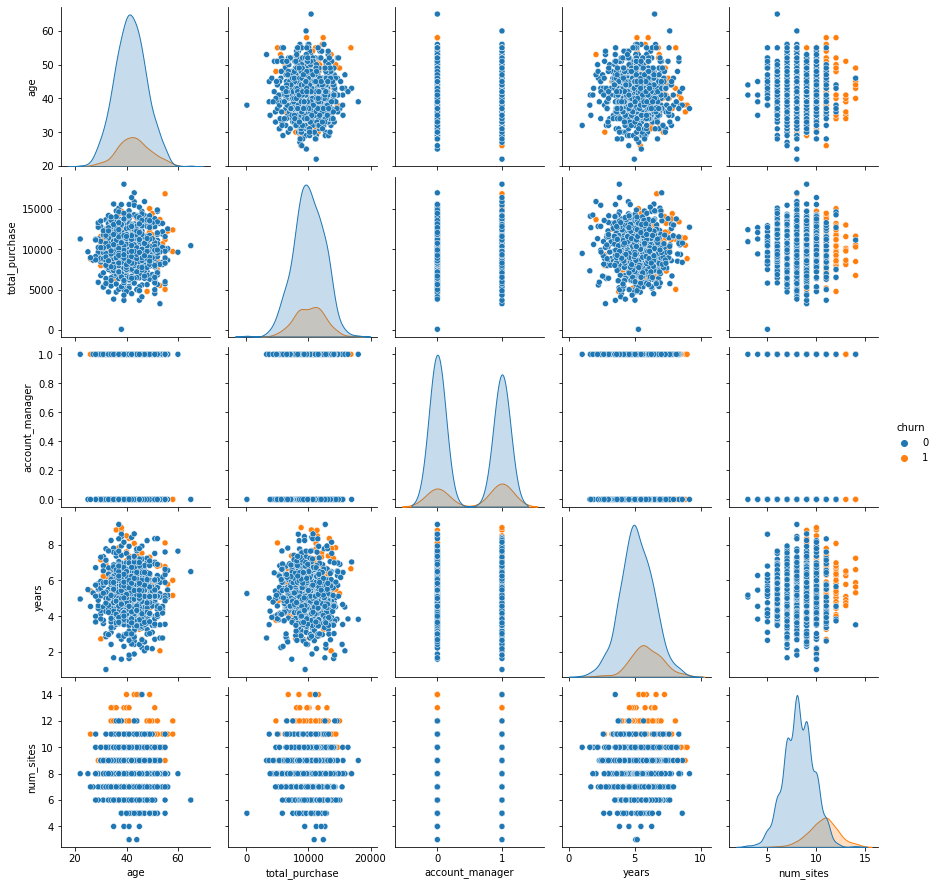

In [43]:
import seaborn as sns
sns.pairplot(kor_data, hue = "churn");

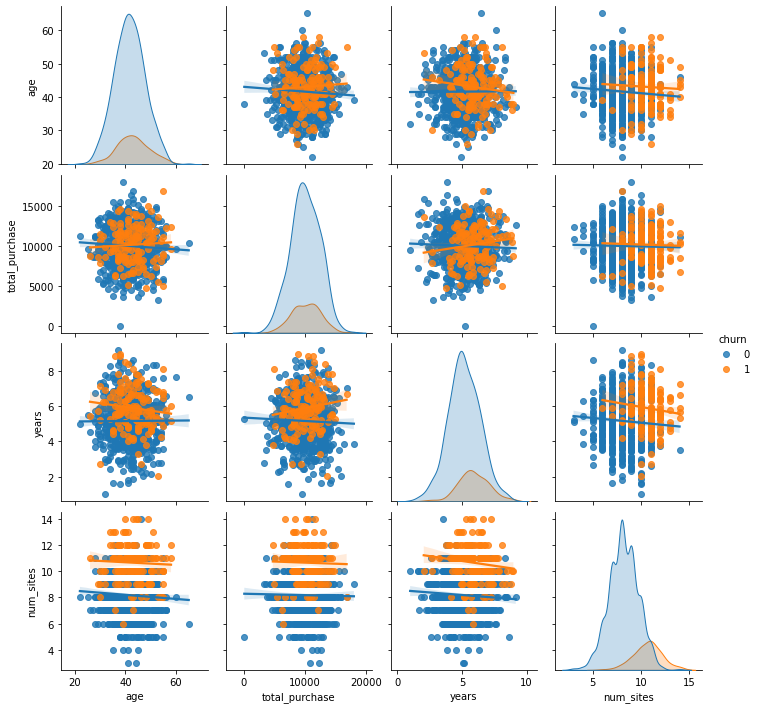

In [44]:
sns.pairplot(kor_data, vars = ["age", "total_purchase","years","num_sites"], 
             hue = "churn",
            kind = "reg");

## Data PreProccessing

In [45]:
spark_df = spark_df.dropna()

In [46]:
spark_df = spark_df.withColumn("age_kare", spark_df.age**2)
spark_df.show(3)

+-----+----------------+----+--------------+---------------+-----+---------+-----+--------+
|index|           names| age|total_purchase|account_manager|years|num_sites|churn|age_kare|
+-----+----------------+----+--------------+---------------+-----+---------+-----+--------+
|    0|Cameron Williams|42.0|       11066.8|              0| 7.22|      8.0|    1|  1764.0|
|    1|   Kevin Mueller|41.0|      11916.22|              0|  6.5|     11.0|    1|  1681.0|
|    2|     Eric Lozano|38.0|      12884.75|              0| 6.67|     12.0|    1|  1444.0|
+-----+----------------+----+--------------+---------------+-----+---------+-----+--------+
only showing top 3 rows



In [47]:
from pyspark.ml.feature import StringIndexer
# StringIndexer: Etiket düzenleyici bir fonksiyondur.

stringIndexer = StringIndexer(inputCol = "churn", outputCol = "label")

In [49]:
?stringIndexer

In [54]:
indexed.show(3)

+-----+----------------+----+--------------+---------------+-----+---------+-----+--------+-----+
|index|           names| age|total_purchase|account_manager|years|num_sites|churn|age_kare|label|
+-----+----------------+----+--------------+---------------+-----+---------+-----+--------+-----+
|    0|Cameron Williams|42.0|       11066.8|              0| 7.22|      8.0|    1|  1764.0|  1.0|
|    1|   Kevin Mueller|41.0|      11916.22|              0|  6.5|     11.0|    1|  1681.0|  1.0|
|    2|     Eric Lozano|38.0|      12884.75|              0| 6.67|     12.0|    1|  1444.0|  1.0|
+-----+----------------+----+--------------+---------------+-----+---------+-----+--------+-----+
only showing top 3 rows



In [51]:
indexed = stringIndexer.fit(spark_df).transform(spark_df)

In [52]:
indexed.dtypes

[('index', 'int'),
 ('names', 'string'),
 ('age', 'double'),
 ('total_purchase', 'double'),
 ('account_manager', 'int'),
 ('years', 'double'),
 ('num_sites', 'double'),
 ('churn', 'int'),
 ('age_kare', 'double'),
 ('label', 'double')]

In [55]:
# withColumn: add new column
spark_df = indexed.withColumn("label", indexed["label"].cast("integer"))

In [56]:
spark_df.dtypes

[('index', 'int'),
 ('names', 'string'),
 ('age', 'double'),
 ('total_purchase', 'double'),
 ('account_manager', 'int'),
 ('years', 'double'),
 ('num_sites', 'double'),
 ('churn', 'int'),
 ('age_kare', 'double'),
 ('label', 'int')]

In [ ]:
#bagimsiz degiskenlerin ayarlanmasi

In [57]:
from pyspark.ml.feature import VectorAssembler

In [58]:
spark_df.columns

['index',
 'names',
 'age',
 'total_purchase',
 'account_manager',
 'years',
 'num_sites',
 'churn',
 'age_kare',
 'label']

In [59]:
bag = ["age","total_purchase", "account_manager","years","num_sites"]
vectorAssembler = VectorAssembler(inputCols = bag, outputCol = "features")

In [60]:
va_df = vectorAssembler.transform(spark_df)
final_df = va_df.select(["features","label"])
final_df.show()

+--------------------+-----+
|            features|label|
+--------------------+-----+
|[42.0,11066.8,0.0...|    1|
|[41.0,11916.22,0....|    1|
|[38.0,12884.75,0....|    1|
|[42.0,8010.76,0.0...|    1|
|[37.0,9191.58,0.0...|    1|
|[48.0,10356.02,0....|    1|
|[44.0,11331.58,1....|    1|
|[32.0,9885.12,1.0...|    1|
|[43.0,14062.6,1.0...|    1|
|[40.0,8066.94,1.0...|    1|
|[30.0,11575.37,1....|    1|
|[45.0,8771.02,1.0...|    1|
|[45.0,8988.67,1.0...|    1|
|[40.0,8283.32,1.0...|    1|
|[41.0,6569.87,1.0...|    1|
|[38.0,10494.82,1....|    1|
|[45.0,8213.41,1.0...|    1|
|[43.0,11226.88,0....|    1|
|[53.0,5515.09,0.0...|    1|
|[46.0,8046.4,1.0,...|    1|
+--------------------+-----+
only showing top 20 rows



## Test-train split

In [66]:
splits = final_df.randomSplit([0.7,0.3], seed=42)
train_df = splits[0]
test_df = splits[1]

In [73]:
train_df.show(5)

+--------------------+-----+
|            features|label|
+--------------------+-----+
|[22.0,11254.38,1....|    0|
|[25.0,9672.03,0.0...|    0|
|[26.0,8939.61,0.0...|    0|
|[27.0,8628.8,1.0,...|    0|
|[28.0,8670.98,0.0...|    0|
+--------------------+-----+
only showing top 5 rows



In [71]:
test_df.show(5)

+--------------------+-----+
|            features|label|
+--------------------+-----+
|[26.0,8787.39,1.0...|    1|
|[28.0,9090.43,1.0...|    0|
|[28.0,11204.23,0....|    0|
|[28.0,11245.38,0....|    0|
|[29.0,9617.59,0.0...|    0|
+--------------------+-----+
only showing top 5 rows



# ML Model Training

In [74]:
from pyspark.ml.classification import LogisticRegression
from pyspark.ml.classification import DecisionTreeClassifier
from pyspark.ml.classification import GBTClassifier
from pyspark.ml.classification import RandomForestClassifier
from pyspark.ml.classification import LinearSVC
from pyspark.ml.classification import NaiveBayes

In [77]:
gbm = GBTClassifier(maxIter = 10, 
                    featuresCol = "features", 
                    labelCol = "label")

gbm_model = gbm.fit(train_df)
y_pred = gbm_model.transform(test_df)

In [78]:
y_pred.show(10)

+--------------------+-----+--------------------+--------------------+----------+
|            features|label|       rawPrediction|         probability|prediction|
+--------------------+-----+--------------------+--------------------+----------+
|[26.0,8787.39,1.0...|    1|[-0.2626624838182...|[0.37160792356707...|       1.0|
|[28.0,9090.43,1.0...|    0|[-0.5540009522506...|[0.24824358295610...|       1.0|
|[28.0,11204.23,0....|    0|[-0.7677312086455...|[0.17719587423095...|       1.0|
|[28.0,11245.38,0....|    0|[1.20113739369421...|[0.91700060302002...|       0.0|
|[29.0,9617.59,0.0...|    0|[1.03851589238911...|[0.88865066507639...|       0.0|
|[29.0,10203.18,1....|    0|[1.24868994794392...|[0.92395793669925...|       0.0|
|[29.0,11274.46,1....|    0|[1.22056405406422...|[0.91991024101413...|       0.0|
|[30.0,6744.87,0.0...|    0|[0.84080040098962...|[0.84311638734404...|       0.0|
|[30.0,8403.78,1.0...|    0|[1.22683451768636...|[0.92082934659882...|       0.0|
|[30.0,8874.83,0

In [79]:
ac = y_pred.select("label","prediction")
ac.filter(ac.label == ac.prediction).count() / ac.count()

0.8412017167381974

## Model Tuning

In [ ]:
from pyspark.ml.evaluation import BinaryClassificationEvaluator
from pyspark.ml.tuning import ParamGridBuilder, CrossValidator

paramGrid = (ParamGridBuilder()
             .addGrid(gbm.maxDepth, [2, 4, 6])
             .addGrid(gbm.maxBins, [20, 30])
             .addGrid(gbm.maxIter, [10, 20])
             .build())

cv = CrossValidator(estimator= gbm, 
                    estimatorParamMaps = paramGrid, 
                    evaluator=evaluator, 
                    numFolds= 10)

In [82]:
cv_model = cv.fit(train_df)
y_pred = cv_model.transform(test_df)
y_pred.show(10)

+--------------------+-----+--------------------+--------------------+----------+
|            features|label|       rawPrediction|         probability|prediction|
+--------------------+-----+--------------------+--------------------+----------+
|[26.0,8787.39,1.0...|    1|[-0.3241414023285...|[0.34337660763842...|       1.0|
|[28.0,9090.43,1.0...|    0|[0.53446340686966...|[0.74439277190783...|       0.0|
|[28.0,11204.23,0....|    0|[0.56077923259206...|[0.75427768129796...|       0.0|
|[28.0,11245.38,0....|    0|[1.13405064474079...|[0.90620051963540...|       0.0|
|[29.0,9617.59,0.0...|    0|[1.23408682279079...|[0.92188033764131...|       0.0|
|[29.0,10203.18,1....|    0|[1.13405064474079...|[0.90620051963540...|       0.0|
|[29.0,11274.46,1....|    0|[1.23408682279079...|[0.92188033764131...|       0.0|
|[30.0,6744.87,0.0...|    0|[1.17151230823768...|[0.91237818759342...|       0.0|
|[30.0,8403.78,1.0...|    0|[1.23408682279079...|[0.92188033764131...|       0.0|
|[30.0,8874.83,0

## Evaluation Metrics

In [83]:
# Test data
ac = y_pred.select("label","prediction")
ac.filter(ac.label == ac.prediction).count() / ac.count()

0.9012875536480687

In [84]:
evaluator = BinaryClassificationEvaluator()
# (rawPredictionCol='rawPrediction', labelCol='label', metricName='areaUnderROC', weightCol=None, numBins=1000)

evaluator.evaluate(y_pred)

0.9000889227642277

In [115]:
# Train data
y_train_pred = cv_model.transform(train_df)

ac = y_train_pred.select("label","prediction")
ac.filter(ac.label == ac.prediction).count() / ac.count()

0.8950524737631185

In [116]:
evaluator.evaluate(y_train_pred)

0.9070895399690901

## Model Prediction

In [101]:
import pandas as pd
names = pd.Series(["James Dean", "Donald Trump", "Bill Clinton","Polat Alemdar", "Henry Kissinger", "Volodimir Zelenski"])
age = pd.Series([38, 43, 34, 50, 40, 35])
total_purchase = pd.Series([30000, 10000, 6000, 30000, 100000, 20000])
account_manager = pd.Series([1,0,0,1,1,0])
years = pd.Series([20, 10, 3, 8, 30, 12])
num_sites = pd.Series([30,8,8,6,50,20])


new_customers = pd.DataFrame({
                            'names':names,
                            'age': age,
                            'total_purchase': total_purchase,
                            'account_manager': account_manager ,
                            'years': years,
                            'num_sites': num_sites})

new_customers

,names,age,total_purchase,account_manager,years,num_sites
0,James Dean,38,30000,1,20,30
1,Donald Trump,43,10000,0,10,8
2,Bill Clinton,34,6000,0,3,8
3,Polat Alemdar,50,30000,1,8,6
4,Henry Kissinger,40,100000,1,30,50
5,Volodimir Zelenski,35,20000,0,12,20


In [102]:
new_sdf = spark.createDataFrame(new_customers)
new_sdf.show()

+------------------+---+--------------+---------------+-----+---------+
|             names|age|total_purchase|account_manager|years|num_sites|
+------------------+---+--------------+---------------+-----+---------+
|        James Dean| 38|         30000|              1|   20|       30|
|      Donald Trump| 43|         10000|              0|   10|        8|
|      Bill Clinton| 34|          6000|              0|    3|        8|
|     Polat Alemdar| 50|         30000|              1|    8|        6|
|   Henry Kissinger| 40|        100000|              1|   30|       50|
|Volodimir Zelenski| 35|         20000|              0|   12|       20|
+------------------+---+--------------+---------------+-----+---------+



In [103]:
new_customers = vectorAssembler.transform(new_sdf)

In [104]:
predictions = cv_model.transform(new_customers)
predictions.select("names","prediction").show()

+------------------+----------+
|             names|prediction|
+------------------+----------+
|        James Dean|       1.0|
|      Donald Trump|       0.0|
|      Bill Clinton|       0.0|
|     Polat Alemdar|       0.0|
|   Henry Kissinger|       1.0|
|Volodimir Zelenski|       1.0|
+------------------+----------+



## Training with Other Algorithms

In [105]:
from pyspark.ml.classification import LogisticRegression
from pyspark.ml.classification import DecisionTreeClassifier
from pyspark.ml.classification import GBTClassifier
from pyspark.ml.classification import RandomForestClassifier
from pyspark.ml.classification import LinearSVC
from pyspark.ml.classification import NaiveBayes

In [106]:
from pyspark.ml.classification import LogisticRegression
lr = LogisticRegression(featuresCol = "features", labelCol = 'label', maxIter=10)
lr_model = lr.fit(train_df)
y_pred = lr_model.transform(test_df)
ac = y_pred.select("label", "prediction")
ac.filter(ac.label == ac.prediction).count() / ac.count()

0.8583690987124464

In [107]:
from pyspark.ml.classification import DecisionTreeClassifier
dt = DecisionTreeClassifier(featuresCol = 'features', labelCol = 'label', maxDepth = 3)
dt_model = dt.fit(train_df)
y_pred = dt_model.transform(test_df)
ac = y_pred.select("label", "prediction")
ac.filter(ac.label == ac.prediction).count() / ac.count()

0.8927038626609443

In [108]:
from pyspark.ml.classification import RandomForestClassifier
rf = RandomForestClassifier(featuresCol = 'features', labelCol = 'label')
rf_model = rf.fit(train_df)
y_pred = rf_model.transform(test_df)
ac = y_pred.select("label", "prediction")
ac.filter(ac.label == ac.prediction).count() / ac.count()

0.8969957081545065

In [109]:
from pyspark.ml.classification import LinearSVC
svc = LinearSVC(featuresCol = "features", labelCol = 'label', maxIter=10)
svc_model = svc.fit(train_df)
y_pred = svc_model.transform(test_df)
ac = y_pred.select("label", "prediction")
ac.filter(ac.label == ac.prediction).count() / ac.count()

0.8240343347639485

In [110]:
from pyspark.ml.classification import NaiveBayes
nb = NaiveBayes(featuresCol = "features", labelCol = 'label')
nb_model = nb.fit(train_df)
y_pred = nb_model.transform(test_df)
ac = y_pred.select("label", "prediction")
ac.filter(ac.label == ac.prediction).count() / ac.count()

0.8240343347639485